

**Corporate‑speak version:**
We run a least-squares optimization pipeline to minimize the total “error gap” between our predictions and reality.

**Plain English version:**
For every point, we check how far it is from our line (that’s called error or residual).
We adjust the line’s slope and position again and again until the overall error is as small as mathematically possible.

The final line is:

    𝑦 = 𝑚𝑥 + 𝑏



Where:

m = slope (how steeply your output changes when input changes)

b = intercept (where your line crosses the Y-axis when X=0)


Linear regression = best‑fit straight line to make predictions.


 **Why is it useful?**

* To predict: “If we spend $10k more on marketing, how many more units might we sell?”

* To understand relationships: “Does more study time actually lead to higher scores?”

* To simplify complexity: real-world messy data → one clean predictive rule.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv("/content/linear_regression_with_outliers.csv")

In [13]:
df.rename(columns = {'X':'studytime','y':'score'},inplace=True)

In [53]:
df.describe()


,studytime,score
count,205.000000,205.000000
mean,73.169268,204.868550
std,29.579194,89.619141
min,25.552212,52.016898
25%,47.793516,125.795420
50%,74.262510,201.590703
75%,100.555114,283.463958
max,123.688694,427.460451


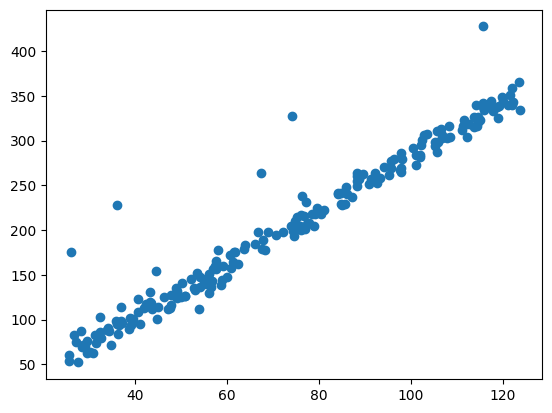

In [46]:
plt.scatter(df['studytime'],df['score'])
plt.show()

In [50]:
def loss_func(m,b,points):
  total_error = 0
  for i in range(len(points)):
    x = points.iloc[i].studytime
    y = points.iloc[i].score
    total_error += (y - (m*x + b))**2
  total_error/float(len(points))


In [55]:
def graident_descent(m_now,b_now,points,l):
  m_grad = 0
  b_grad = 0
  n= len(points)
  for i in range(len(points)):
    x = points.iloc[i].studytime
    y = points.iloc[i].score

    m_grad += -(2/n) * x * (y - (m_now *x + b_now))
    b_grad += -(2/n) * (y - (m_now *x + b_now))
  m = m_now - m_grad * l
  b = b_now - b_grad * l
  return m,b

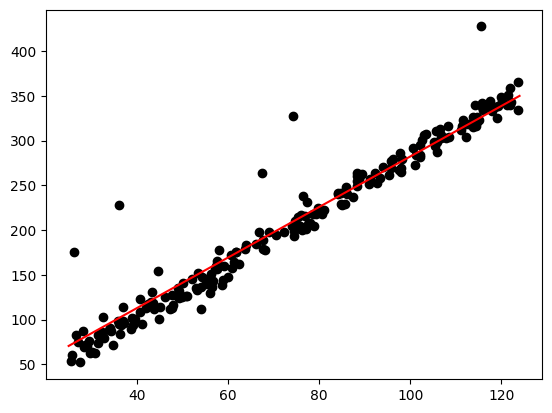

In [58]:
m =0
b= 0
l =0.0001
epochs = 300
for i in range(epochs):
  m,b = graident_descent(m,b,df,l)

plt.scatter(df['studytime'],df['score'],color = 'black')
plt.plot(list(range(25,125)),[m *x + b for x in range (25,125)], color = 'red' )
plt.show()